In [1]:
import pandas as pd
import os

In [2]:

# 1. Define the files and their corresponding day
#    (Using the exact paths you provided)
file_map = [
    ("/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/TargetKD.csv", 0),
    ("/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/TargetKD.csv", 1),
    ("/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/TargetKD.csv", 2),
    ("/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/TargetKD.csv", 3)
]

dfs = []

# 2. Loop through, read, and tag
for path, day in file_map:
    # Check if file exists to avoid crashing if one is missing
    if os.path.exists(path):
        df = pd.read_csv(path)
        df['day'] = day  # Add the 'day' column
        dfs.append(df)
        print(f"Loaded Day {day}: {path} ({len(df)} rows)")
    else:
        print(f"⚠️ Warning: File not found for Day {day}: {path}")

# 3. Combine into one DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    
    print(f"\n✅ Combined DataFrame shape: {combined_df.shape}")
    print(combined_df.head())
    
    # 4. (Optional) Save the combined result to a new CSV
    output_path = "/oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/combined_TargetKD.csv"
    combined_df.to_csv(output_path, index=False)
    print(f"Saved combined CSV to: {output_path}")
else:
    print("No files were loaded.")

Loaded Day 0: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d0_sceptre_transfer/TargetKD.csv (281 rows)
Loaded Day 1: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d1_sceptre_transfer/TargetKD.csv (281 rows)
Loaded Day 2: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d2_sceptre_transfer/TargetKD.csv (279 rows)
Loaded Day 3: /oak/stanford/groups/engreitz/Users/tri/CodeBase/programDE/notebooks/d3_sceptre_transfer/TargetKD.csv (287 rows)

✅ Combined DataFrame shape: (1128, 9)
          response_id grna_target  n_nonzero_trt  n_nonzero_cntrl  pass_qc  \
0  ENSG00000173473.11     SMARCC1            232            23529     True   
1  ENSG00000167978.18       SRRM2            322            28357     True   
2  ENSG00000110321.19      EIF4G2            186            27296     True   
3   ENSG00000153147.6     SMARCA5            249            23133     True   
4  ENSG00000145907.16       G3BP1            274            242

In [3]:
%load_ext rpy2.ipython

In [4]:
# Pass the python variable 'combined_df' directly into R
%R -i combined_df

# Now it is available in R as 'combined_df'
%R print(head(combined_df))

         response_id grna_target n_nonzero_trt n_nonzero_cntrl pass_qc
0 ENSG00000173473.11     SMARCC1           232           23529    TRUE
1 ENSG00000167978.18       SRRM2           322           28357    TRUE
2 ENSG00000110321.19      EIF4G2           186           27296    TRUE
3  ENSG00000153147.6     SMARCA5           249           23133    TRUE
4 ENSG00000145907.16       G3BP1           274           24285    TRUE
5 ENSG00000114867.22      EIF4G1           155           25383    TRUE
       p_value log_2_fold_change significant day
0 2.743170e-97         -1.646602        TRUE   0
1 1.162209e-81         -1.133387        TRUE   0
2 1.783802e-71         -1.371093        TRUE   0
3 2.244070e-66         -1.240051        TRUE   0
4 6.305057e-63         -1.070321        TRUE   0
5 1.664781e-56         -1.399225        TRUE   0


,response_id,grna_target,n_nonzero_trt,n_nonzero_cntrl,pass_qc,p_value,log_2_fold_change,significant,day
0,ENSG00000173473.11,SMARCC1,232,23529,True,2.743170e-97,-1.646602,True,0
1,ENSG00000167978.18,SRRM2,322,28357,True,1.162209e-81,-1.133387,True,0
2,ENSG00000110321.19,EIF4G2,186,27296,True,1.783802e-71,-1.371093,True,0
3,ENSG00000153147.6,SMARCA5,249,23133,True,2.244070e-66,-1.240051,True,0
4,ENSG00000145907.16,G3BP1,274,24285,True,6.305057e-63,-1.070321,True,0
5,ENSG00000114867.22,EIF4G1,155,25383,True,1.664781e-56,-1.399225,True,0


In [5]:
%%R
library(tidyverse)

# Filter for significant rows only
significant_df <- combined_df %>%
  filter(significant == TRUE)

# Verify the result
print(paste("Original rows:", nrow(combined_df)))
print(paste("Significant rows:", nrow(significant_df)))
print(head(significant_df))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[1] "Original rows: 1128"
[1] "Significant rows: 1059"
         response_id grna_target n_nonzero_trt n_nonzero_cntrl pass_qc
0 ENSG00000173473.11     SMARCC1           232           23529    TRUE
1 ENSG00000167978.18       SRRM2           322           28357    TRUE
2 ENSG00000110321.19      EIF4G2           186           27296    TRUE
3  ENSG00000153147.6     SMARCA5           249           23133    TRUE
4 ENSG00000145907.16       G3BP1           274           24285    

In addition: Warning messages:
1: package ‘ggplot2’ was built under R version 4.5.2 
2: package ‘tibble’ was built under R version 4.5.2 
3: package ‘tidyr’ was built under R version 4.5.2 
4: package ‘readr’ was built under R version 4.5.2 
5: package ‘purrr’ was built under R version 4.5.2 
6: package ‘stringr’ was built under R version 4.5.2 


In [6]:
%%R
# Add the KD column based on the formula: (1 - 2^(log2FC)) * 100
significant_df <- significant_df %>%
  mutate(KD = (1 - (2^log_2_fold_change)) * 100)

# Verify the new column
print(head(significant_df %>% select(grna_target, log_2_fold_change, KD)))

  grna_target log_2_fold_change       KD
0     SMARCC1         -1.646602 68.06084
1       SRRM2         -1.133387 54.41557
2      EIF4G2         -1.371093 61.34017
3     SMARCA5         -1.240051 57.66424
4       G3BP1         -1.070321 52.37870
5      EIF4G1         -1.399225 62.08672


In [7]:
%%R
library(ggplot2)
library(hrbrthemes)
library(viridis)

Loading required package: viridisLite


R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1: Removed 159 rows containing non-finite outside the scale range
(`stat_boxplot()`). 
  
R callback write-console: 2: Removed 159 rows containing missing values or values outside the scale range
(`geom_point()`). 
  


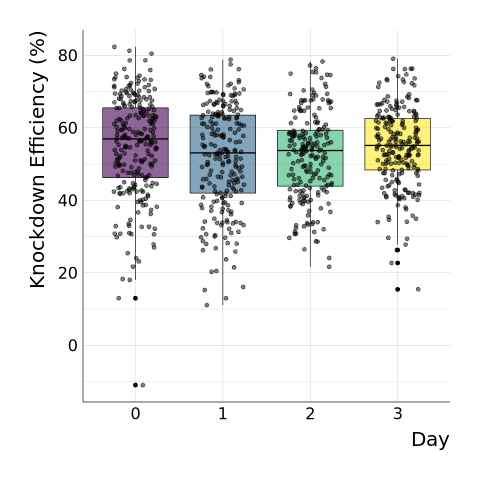

In [13]:
%%R
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)
ggplot(significant_df, aes(x = factor(day), y = KD, fill = factor(day))) +
      geom_boxplot(lwd = 0.3, color = "black") +
      scale_fill_viridis(discrete = TRUE, alpha=0.6) +
      geom_jitter(width = 0.25, alpha = 0.5) +
      labs(x = "Day", y = "Knockdown Efficiency (%)", fill = "Day") +
      theme_ipsum() +
      theme(
        legend.position="none",
        axis.line = element_line(linewidth = 0.3, color = "black"),
        axis.text.x = element_text(size = 16, color = "black"), # X-axis tick labels
        axis.text.y = element_text(size = 16, color = "black"), # Y-axis tick labels
        axis.title.x = element_text(size = 20, margin = margin(t = 10)),  # X-axis title
        axis.title.y = element_text(size = 20, margin = margin(r = 10))   # Y-axis title
      )